In [1]:
from importlib import reload

import numpy as np
import pandas as pd
import graph_tool.all as gt
import matplotlib.pyplot as plt

from gptomics import graph, plot

In [2]:
df = pd.read_csv("../data/220508_gpt-j-compositions.csv", index_col=0)

In [3]:
df.head()

,src_type,src_layer,src_index,dst_type,dst_layer,dst_index,term_type,term_value
0,layernorm_bias,0,0,att_head,0,0,Q,0.010643
1,layernorm_bias,0,0,att_head,0,1,Q,0.017541
2,layernorm_bias,0,0,att_head,0,2,Q,0.017403
3,layernorm_bias,0,0,att_head,0,3,Q,0.023598
4,layernorm_bias,0,0,att_head,0,4,Q,0.014652


In [4]:
attdf = df[(df.src_type == "att_head")
           & (df.dst_type == "att_head")]

In [5]:
%%time
g = graph.pair_term_graph(attdf)

CPU times: user 6.92 s, sys: 49.6 ms, total: 6.97 s
Wall time: 6.97 s


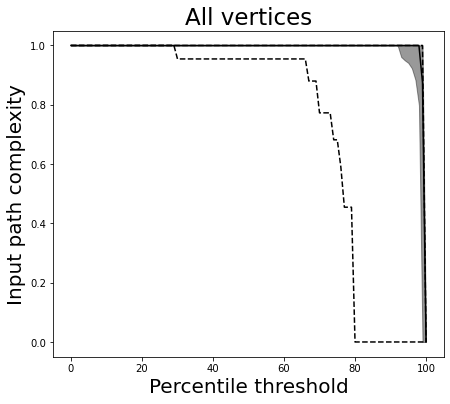

In [11]:
plt.figure(figsize=(7, 6))

percs = graph.ipc_percentiles(g, [0, 25, 50, 75, 100])
plot.plot_ipc_percentiles(percs)

plt.title("All vertices", fontsize=23)
plt.show()

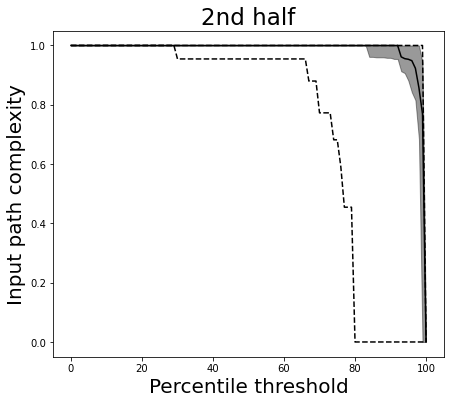

In [12]:
plt.figure(figsize=(7, 6))

percs = graph.ipc_percentiles(
    g,
    [0, 25, 50, 75, 100],
    g.vertex_properties["layer"].a >= 14,
)
plot.plot_ipc_percentiles(percs)

plt.title("2nd half", fontsize=23)
plt.show()

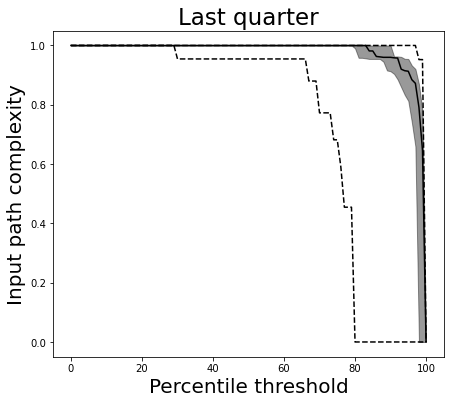

In [13]:
plt.figure(figsize=(7, 6))

percs = graph.ipc_percentiles(
    g,
    [0, 25, 50, 75, 100],
    g.vertex_properties["layer"].a >= 21,
)
plot.plot_ipc_percentiles(percs)

plt.title("Last quarter", fontsize=23)
plt.show()